# Importing all the libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetching the data

In [32]:
url = "http://bit.ly/w-data"
students = pd.read_csv(url)

In [33]:
students.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [34]:
students.shape

(25, 2)

# Plotting the Hours Vs Percentage graph

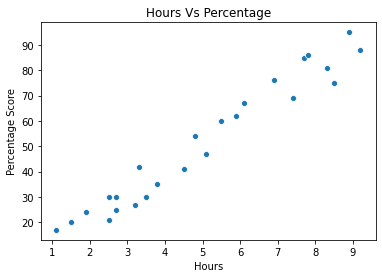

In [35]:
sns.scatterplot(students['Hours'],students['Scores'])
plt.title('Hours Vs Percentage')
plt.ylabel('Percentage Score')
plt.show()

# Extracting input and output columns

In [36]:
X = students['Hours'].values.reshape(25,1)

In [37]:
y = students['Scores'].values

# Dividing the training and testing data

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


# Training the model

In [40]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [41]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Plotting the regression line

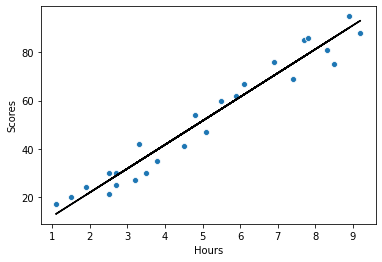

In [42]:
plt.plot(X_train,reg.predict(X_train),color='black')
sns.scatterplot(students['Hours'],students['Scores'])
plt.show()

# Predicting the model

In [43]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [44]:
y_pred = reg.predict(X_test)

In [45]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
prediction

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [46]:
from sklearn.metrics import r2_score, mean_absolute_error

print('R2 Score: ',r2_score(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred))

R2 Score:  0.9454906892105356
Mean Absolute Error:  4.183859899002975


### Prediction value of marks if a student studies 9.25 hrs

In [47]:
hours = 9.25
score = reg.predict([[hours]])
print('Predicted Score: ',score[0])

Predicted Score:  93.69173248737538
